In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


In [3]:
#Data preparation

x=pd.read_csv("./Dataset/fashion-mnist.csv")
A=np.array(x)
print(A.shape)

(10000, 785)


In [4]:
X=A[:,1:]
Y=A[:,0]
#normalization
X=X/255

In [6]:
print(X.shape,Y.shape)

(10000, 784) (10000,)


In [7]:
#count number of unique classes we have
np.unique(Y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [10]:
X_train=X.reshape((10000,28,28,-1))

#one-hot encoding
Y_train=np_utils.to_categorical(Y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


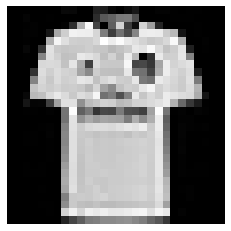

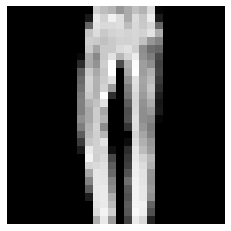

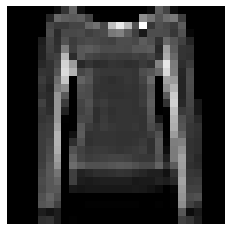

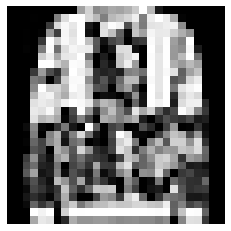

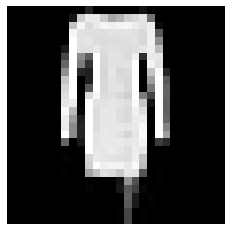

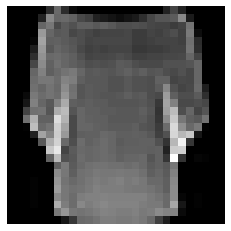

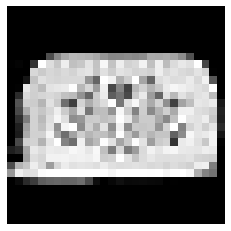

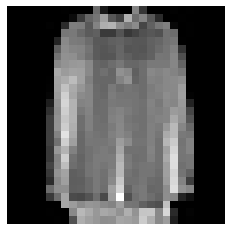

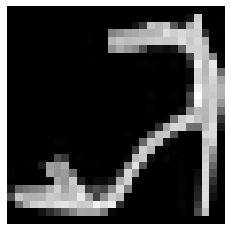

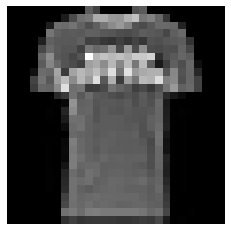

In [14]:
import matplotlib.pyplot as plt

for i in range(10):
    #plt.figure(i)
    plt.axis("off")
    plt.imshow(X_train[i].reshape((28,28)),cmap="gray")
    plt.show()

# CNN Model

In [15]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(16,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 16)          12816     
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [16]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
hist=model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 22s 3ms/step - loss: 1.4963 - accuracy: 0.4406 - val_loss: 0.9759 - val_accuracy: 0.6520
Epoch 2/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.8304 - accuracy: 0.6836 - val_loss: 0.7923 - val_accuracy: 0.6915
Epoch 3/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.7063 - accuracy: 0.7325 - val_loss: 0.6689 - val_accuracy: 0.7570
Epoch 4/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.6127 - accuracy: 0.7620 - val_loss: 0.6111 - val_accuracy: 0.7775
Epoch 5/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.5605 - accuracy: 0.7893 - val_loss: 0.5717 - val_accuracy: 0.7915
Epoch 6/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.5318 - accuracy: 0.8015 - val_loss: 0.5470 - val_accuracy: 0.7950
Epoch 7/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.488

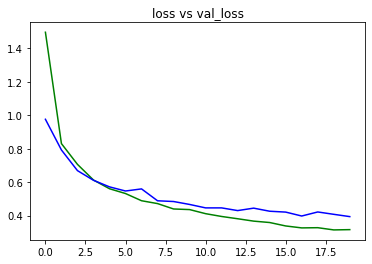

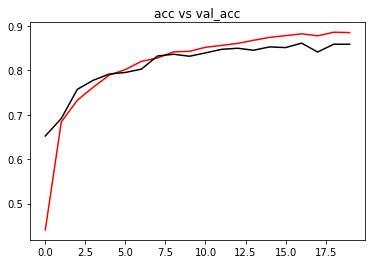

In [19]:
plt.figure(0)
plt.title('loss vs val_loss')
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()

plt.figure(1)
plt.title('acc vs val_acc')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()